# 3. Creating figures
The primary goal of this document is to generate, visualize, and analyze results derived from various machine learning models applied to our data. By the end of this exploration, we'll have a series of informative plots that can guide us in assessing the performance of these models.

### Structure:

1. Packages and Data: Initially, we will be loading essential packages and datasets that facilitate our exploration. These include common libraries like pandas, numpy, and matplotlib, as well as specific tools from sklearn.metrics and our custom utility ml_helper.

2. Results Table with Confidence Intervals: After loading the data, we will process the results from different models (both logistic regression and XGBoost, with varying feature sets). We'll then compute the confidence intervals for various metrics to gauge the robustness and consistency of our model's performance.

3. ROC AUC Curves: ROC (Receiver Operator Characteristic) curves are a cornerstone in evaluating classification model performances. We'll plot these for our models, allowing us to visually compare and understand the trade-off between sensitivity (True Positive Rate) and specificity (False Positive Rate) for different threshold values.

By the conclusion of this notebook, we'll have a comprehensive visual understanding of the performance of our machine learning models across different metrics and scenarios. Let's begin our exploration!

## 3.0. Packages and data

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import ml_helper as ml_help

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## 3.1. Results table w/ confidence intervals

In [2]:
k_fold_results_directory = '../../results/k_fold_results/'

In [3]:
# Reupload
lr_ts_k_fold_results = pd.read_csv(k_fold_results_directory+'lr_all.csv')
lr_two_k_fold_results = pd.read_csv(k_fold_results_directory+'lr_two.csv')
xgb_ts_k_fold_results = pd.read_csv(k_fold_results_directory+'xgb_ts.csv')
xgb_two_k_fold_results = pd.read_csv(k_fold_results_directory+'xgb_two.csv')

In [4]:
# Define metrics to be calculated for the results table
metrics = ['roc_auc', 'brier', 'logloss', 'mae','accuracy',
           'balanced_accuracy', 'precision','recall',
           'f1', 'specificity']

In [5]:
xgb_two_k_fold_results.threshold.mean()

0.082

In [57]:
xgb_two_k_fold_results

,roc_auc,mae,logloss,brier,threshold,accuracy,precision,recall,f1,predicted_positive_rate,observed_positive_rate,tpr,fpr,specificity,balanced_accuracy
0,0.861882,0.126870,0.226368,0.065183,0.10,0.810702,0.286957,0.727941,0.411642,0.230769,0.090970,0.727941,0.181015,0.818985,0.773463
1,0.871728,0.128009,0.223571,0.063501,0.09,0.802676,0.310526,0.781457,0.444444,0.254181,0.101003,0.781457,0.194940,0.805060,0.793258
2,0.840679,0.130991,0.237397,0.067692,0.06,0.648829,0.200000,0.881944,0.326059,0.424749,0.096321,0.881944,0.376018,0.623982,0.752963
3,0.860424,0.122980,0.221367,0.061973,0.10,0.811371,0.312676,0.744966,0.440476,0.237458,0.099666,0.744966,0.181278,0.818722,0.781844
4,0.824968,0.129099,0.234420,0.064417,0.10,0.795987,0.270195,0.692857,0.388778,0.240134,0.093645,0.692857,0.193358,0.806642,0.749750
5,0.834879,0.127740,0.232972,0.065630,0.06,0.675585,0.202422,0.829787,0.325452,0.386622,0.094314,0.829787,0.340473,0.659527,0.744657
6,0.861877,0.120950,0.207782,0.057164,0.07,0.710368,0.206963,0.823077,0.330757,0.345819,0.086957,0.823077,0.300366,0.699634,0.761355
7,0.851596,0.125937,0.222204,0.062230,0.07,0.720884,0.225933,0.833333,0.355487,0.340696,0.092369,0.833333,0.290560,0.709440,0.771386
8,0.860550,0.129066,0.232320,0.067124,0.09,0.791165,0.284615,0.770833,0.415730,0.261044,0.096386,0.770833,0.206667,0.793333,0.782083
9,0.818189,0.127695,0.237415,0.066276,0.08,0.736948,0.218543,0.717391,0.335025,0.303213,0.092369,0.717391,0.261062,0.738938,0.728165


In [6]:
# Calculate confidence intervals for the simple model
simple_results = ml_help.calculate_confidence_intervals(lr_two_k_fold_results, metrics) #lr_two_k_fold_results
simple_results['model'] = 'LR Two Features'
# Calculate confidence intervals for the advanced model
complex_results = ml_help.calculate_confidence_intervals(lr_ts_k_fold_results, metrics)
complex_results['model'] = 'LR All features'

In [7]:
# Calculate confidence intervals for the simple model
simple_results_xgb = ml_help.calculate_confidence_intervals(xgb_two_k_fold_results, metrics) #lr_two_k_fold_results
simple_results_xgb['model'] = 'XGB Two Features'
# Calculate confidence intervals for the advanced model
complex_results_xgb = ml_help.calculate_confidence_intervals(xgb_ts_k_fold_results, metrics)
complex_results_xgb['model'] = 'XGB All Features'

In [8]:
# Combine results and pivot the table 
ci_results = simple_results.append(simple_results_xgb).append(complex_results).append(complex_results_xgb).pivot(columns=['model'], index='metric').T
# Save the results
ci_results.T.to_csv('../../results/mean_results/all_models_ci.csv')

In [9]:
ci_results[['roc_auc', 'balanced_accuracy', 'recall', 'specificity']]

metric                           roc_auc balanced_accuracy            recall  \
      model                                                                    
value LR All features   0.87 (0.86-0.88)  0.80 (0.78-0.81)  0.77 (0.74-0.81)   
      LR Two Features   0.83 (0.81-0.84)  0.76 (0.75-0.77)  0.75 (0.72-0.78)   
      XGB All Features  0.89 (0.88-0.90)  0.80 (0.80-0.81)  0.83 (0.79-0.87)   
      XGB Two Features  0.85 (0.84-0.86)  0.76 (0.75-0.78)  0.78 (0.74-0.82)   

metric                       specificity  
      model                               
value LR All features   0.82 (0.79-0.86)  
      LR Two Features   0.76 (0.72-0.80)  
      XGB All Features  0.78 (0.74-0.81)  
      XGB Two Features  0.75 (0.70-0.79)

## 3.2. ROC AUC curves

In [10]:
# Load full-featured xgb results
with open("../../results/dict_results/xgb_ts", "rb") as fp:   
    #Unpickling 
    xgb_results_ts = pickle.load(fp)

# Extract the observed and predicted probabilities 
xgb_ts_observed = xgb_results_ts['observed']
xgb_ts_predicted_probas = xgb_results_ts['probas']

# Load two-featured xgb results
with open("../../results/dict_results/xgb_results_two", "rb") as fp:   
    #Unpickling 
    xgb_results_two = pickle.load(fp)

# Extract the observed and predicted probabilities 
xgb_two_observed = xgb_results_two['observed']
xgb_two_predicted_probas = xgb_results_two['probas']

In [63]:
sum([len(i) for i in xgb_two_observed])

14947

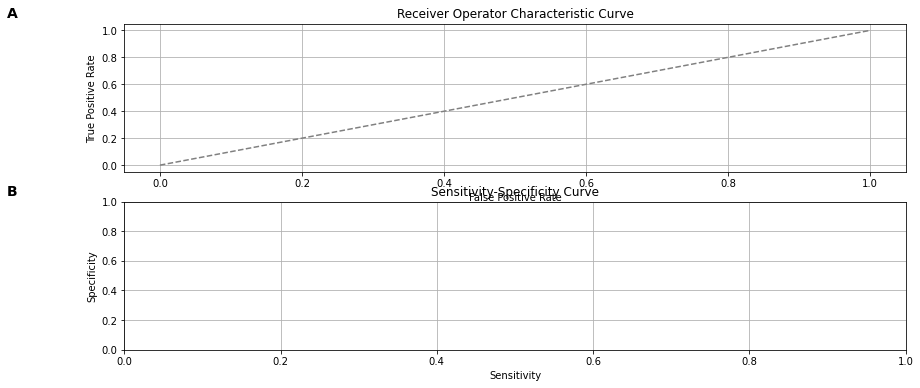

In [11]:
# Set up figure with two subplots
fig, ax = plt.subplots(2,1,figsize=(14,6))

# ROC AUC curve
ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operator Characteristic Curve')
ax[0].text(-0.15, 1.02, 'A', transform=ax[0].transAxes, fontweight="bold", va="bottom", ha="left", fontsize=14)
ax[0].grid(True)

# Sensitivity-specificity curve
ax[1].set_xlabel('Sensitivity')
ax[1].set_ylabel('Specificity')
ax[1].set_title('Sensitivity-Specificity Curve')
ax[1].text(-0.15, 1.02, 'B', transform=ax[1].transAxes, fontweight="bold", va="bottom", ha="left", fontsize=14)
ax[1].grid(True)


In [12]:
color_1 = (96/255, 108/255, 158/255)
color_2 = (193/255, 88/255, 88/255)
# Add the roc curve
ax[0] = ml_help.k_fold_threshold_curves(ax[0], xgb_ts_observed, xgb_ts_predicted_probas, color_2,'-', 'All features')
ax[0] = ml_help.k_fold_threshold_curves(ax[0], xgb_two_observed, xgb_two_predicted_probas, color_1,'-',  'Two features')

# Add the sens-spec curve
ax[1] = ml_help.sens_spec_curve(ax[1], xgb_two_observed, xgb_two_predicted_probas, color_1,'-')
ax[1] = ml_help.sens_spec_curve(ax[1], xgb_ts_observed, xgb_ts_predicted_probas, color_2,'-')

# Add legend
fig.legend()

In [13]:
xgb_all_row = ci_results[['roc_auc', 'balanced_accuracy', 'recall', 'specificity']].iloc[2]
xgb_two_row = ci_results[['roc_auc', 'balanced_accuracy', 'recall', 'specificity']].iloc[3]

In [14]:
xgb_all_row

metric
roc_auc              0.89 (0.88-0.90)
balanced_accuracy    0.80 (0.80-0.81)
recall               0.83 (0.79-0.87)
specificity          0.78 (0.74-0.81)
Name: (value, XGB All Features), dtype: object

In [33]:
# Table data
cols = ['Model', 'ROC AUC', 'Balanced accuracy', 'Sensitivity', 'Specificity']
data = [
    ['Full-featured XGBoost', xgb_all_row[0], xgb_all_row[1], xgb_all_row[2], xgb_all_row[3]],
    ['Two-featured XGBoost', xgb_two_row[0], xgb_two_row[1], xgb_two_row[2], xgb_two_row[3]]
]

In [16]:
# Table data
'''cols = ['Model', 'ROC AUC (95% CI)', 'Balanced accuracy (95% CI)', 'Sensitivity (95% CI)', 'Specificity (95% CI)']
data = [
    ['Full-featured XGBoost', xgb_all_row[0], xgb_all_row[1], xgb_all_row[2], xgb_all_row[3]],
    ['Two-featured XGBoost', xgb_two_row[0], xgb_two_row[1], xgb_two_row[2], xgb_two_row[3]]
]'''

# Adjust the bottom of the figure to make space for the table
fig.subplots_adjust(bottom=0.2)

# Add the table at the bottom of the fig
table_ax = fig.add_axes([0.125, -0.15, 0.775, 0.25])  # Adjust these values to change table position and size
table_ax.axis('off')
table = table_ax.table(cellText=data, colLabels=cols, cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjusting the cell heights
cell_height = 0.25
for i, cell in enumerate(table._cells):
    table._cells[cell].set_height(cell_height)

# Bold the header and the row labels
for (i, j), cell in table.get_celld().items():
    if i == 0 or j == 0:
        cell.set_text_props(fontweight='bold')

# Label for the table
table_ax.text(-0.05, 1, 'C', fontweight="bold", fontsize=14)

# Manually setting the borders
for i in range(len(cols)):
    table[0,i].visible_edges = 'B'  # header row
    table[0,i].visible_edges = 'T'  # 2nd row
    table[1,i].visible_edges = 'T'  # 3rd row
    table[2,i].visible_edges = 'B'  # bottom row


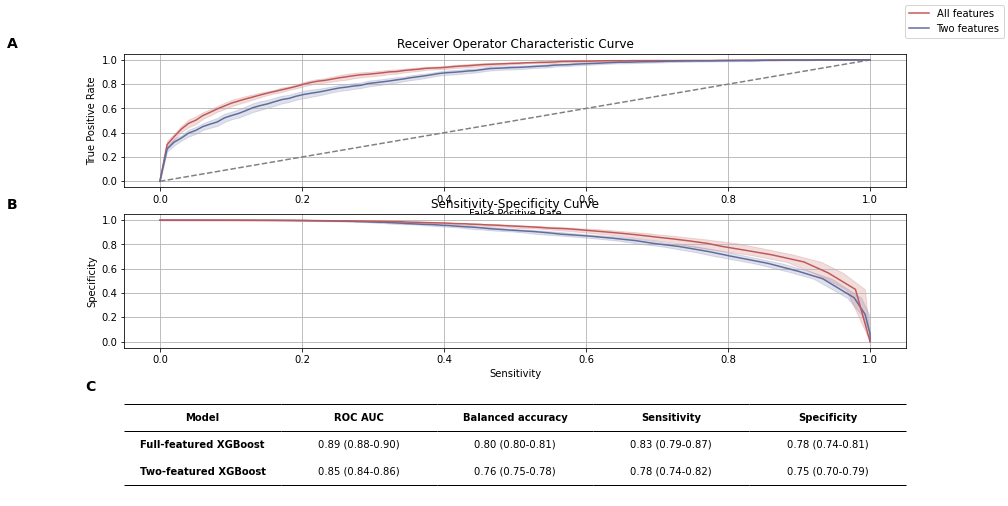

In [17]:
fig

### 3.2.1. ROC curve only

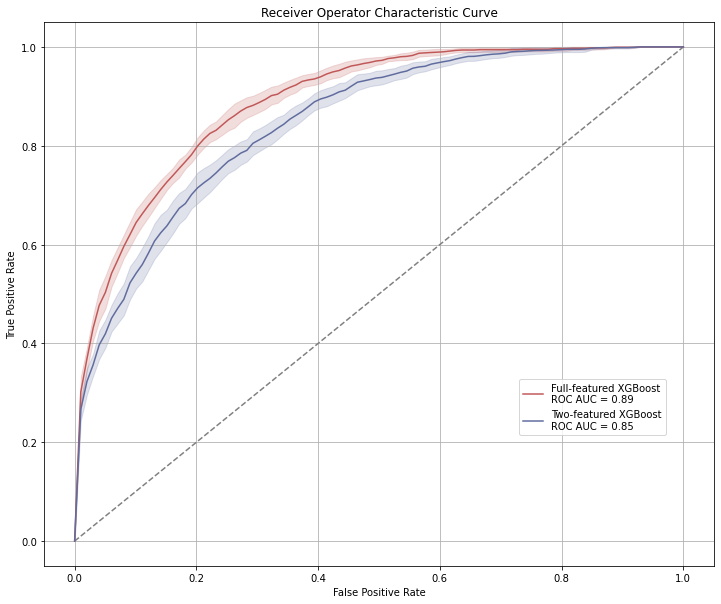

In [116]:
fig, ax = plt.subplots(figsize=(6,5))
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operator Characteristic Curve')
ax.grid(True)

ax = ml_help.k_fold_threshold_curves(ax, xgb_ts_observed, xgb_ts_predicted_probas, color_2,'-', 'Full-featured XGBoost\nROC AUC = 0.89')
ax = ml_help.k_fold_threshold_curves(ax, xgb_two_observed, xgb_two_predicted_probas, color_1,'-',  'Two-featured XGBoost\nROC AUC = 0.85')
fig.legend(loc='lower right', bbox_to_anchor=(0.85, 0.3))


## Violinplot

In [19]:
# Upload dataset with predicted probabilities columns
df = pd.read_csv('../../results/probability_results/xgb.csv')

In [20]:
df.head()

,Unnamed: 0,intensity,day_of_week,time_of_day,duration,form_of_exercise,interval,study,bout_id,start_glc,...,glc__permutation_entropy__dimension_4__tau_1,glc__permutation_entropy__dimension_5__tau_1,glc__permutation_entropy__dimension_6__tau_1,glc__permutation_entropy__dimension_7__tau_1,glc__mean_n_absolute_max__number_of_maxima_7,stratify,probas_xgb_two,probas_xgb_two_fold,probas_xgb_ts,probas_xgb_ts_fold
0,0,0.0,1,afternoon,20.0,aer,5,dexip,dexip_100_20210610130600,6.56,...,1.214890,1.494175,1.747868,1.791759,7.675714,dexip_100_False,0.045296,3,0.009043,3
1,1,0.0,1,afternoon,15.0,aer,5,dexip,dexip_100_20213210153222,10.00,...,1.303092,1.386294,1.475076,1.560710,8.041429,dexip_100_False,0.320021,8,0.000658,8
2,2,0.0,1,evening,25.0,mix,5,dexip,dexip_100_20211110191100,6.61,...,1.002718,1.073543,1.153742,1.242453,6.325714,dexip_100_False,0.050906,2,0.001824,2
3,3,0.0,2,afternoon,15.0,aer,5,dexip,dexip_100_20215811125800,8.94,...,1.581094,1.906155,1.945910,1.791759,6.970000,dexip_100_False,0.013028,7,0.001020,7
4,4,0.0,2,afternoon,15.0,aer,5,dexip,dexip_100_20213511163500,7.22,...,1.427061,1.667462,1.747868,1.791759,6.254286,dexip_100_False,0.009517,0,0.003467,0


In [21]:
# Melt the dataframe
df_melted = df.melt(id_vars=['y'], value_vars=['probas_xgb_ts', 'probas_xgb_two'], 
                    var_name='Model', value_name='Predicted Probability')
# Rename the 'id' column to a new name, e.g., 'ID_new'
df_melted = df_melted.rename(columns={'y': 'Hypoglycaemia'})

# 
df_melted['Model'] = df_melted['Model'].replace({'probas_xgb_ts':'Full-featured XGBoost', 'probas_xgb_two':'Two-featured XGBoost'})

In [22]:
df_melted

,Hypoglycaemia,Model,Predicted Probability
0,False,Full-featured XGBoost,0.009043
1,False,Full-featured XGBoost,0.000658
2,False,Full-featured XGBoost,0.001824
3,False,Full-featured XGBoost,0.001020
4,False,Full-featured XGBoost,0.003467
...,...,...,...
32975,True,Two-featured XGBoost,0.348075
32976,False,Two-featured XGBoost,0.079371
32977,False,Two-featured XGBoost,0.334761
32978,True,Two-featured XGBoost,0.705002


In [23]:
import seaborn as sns 

plt.show()

In [24]:
# Load full-featured xgb results
with open("../../results/dict_results/xgb_ts", "rb") as fp:   
    #Unpickling 
    xgb_results_ts = pickle.load(fp)

# Extract the observed and predicted probabilities 
xgb_ts_observed = xgb_results_ts['observed']
xgb_ts_predicted_probas = xgb_results_ts['probas']

# Load two-featured xgb results
with open("../../results/dict_results/xgb_results_two", "rb") as fp:   
    #Unpickling 
    xgb_results_two = pickle.load(fp)

# Extract the observed and predicted probabilities 
xgb_two_observed = xgb_results_two['observed']
xgb_two_predicted_probas = xgb_results_two['probas']

In [80]:
def assess_calibration(observed, probas):
    """
    Assesses the calibration of a binary classification model using stratified k-fold cross-validation.

    Args:
        X (pd.DataFrame): The input features.
        y (pd.Series): The target variable.
        model: The machine learning model to be trained and evaluated.
        number_of_splits (int): The number of splits for stratified k-fold cross-validation.
        smote (bool, optional): Whether to use SMOTE for oversampling the minority class. Defaults to False.

    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]: The model probability and fraction of positive class results for each run.
    """


    # Set up results DataFrames (to get results from each run)
    results_model_probability = []
    results_fraction_positive = []

    # Loop through the k-fold splits
    loop_counter = 0
    for i in range(0, 10):    
        # Get calibration curve (use quantile to make sure all bins exist)
        fraction_pos, model_prob = calibration_curve(
            observed[i], probas[i],
           # n_bins=number_of_bins,
            strategy='quantile')    

        # record run results
        results_model_probability.append(model_prob)
        results_fraction_positive.append(fraction_pos)
        
        # Increment loop counter
        loop_counter += 1
        
    # Convert results to DataFrame
    results_model_probability = pd.DataFrame(results_model_probability)
    results_fraction_positive = pd.DataFrame(results_fraction_positive)

    return results_model_probability, results_fraction_positive

def get_calibration_curve(results_model_probability, results_fraction_positive, number_of_splits, height, ax, color): 
        """
        Generates a calibration curve plot based on the model probability and fraction positive results from k-fold cross-validation.

        Args:
        results_model_probability (pd.DataFrame): The model probability results for each run.
        results_fraction_positive (pd.DataFrame): The fraction of positive class results for each run.
        number_of_splits (int): The number of splits used in k-fold cross-validation.

        Returns:
        matplotlib.figure.Figure: The generated calibration curve plot.
        """

        # Add individual k-fold runs
        for run in range(number_of_splits):
                ax.plot(results_model_probability.loc[run],
                        results_fraction_positive.loc[run],
                        linestyle='--',
                        linewidth=0.75,
                        color=color, alpha=0.5)

        # Add mean
        ax.plot(results_model_probability.mean(axis=0),
                results_fraction_positive.mean(axis=0),
                linestyle='-',
                linewidth=2,
                color=color,
                label='Mean calibration')

        # Add diagonal
        ax.plot([0, height], [0, height],
                linestyle='--',
                label='Perfect calibration', color='grey')

        ax.set_xlabel('Model predicted probability hypoglycemia')
        ax.set_ylabel('Observed rate of hypoglycemia')

        #ax.set_title('Reliability plot')

        ax.grid()
        #ax.legend()

        return ax


In [78]:
ts_results_model_probability, ts_results_fraction_positive = assess_calibration(xgb_ts_observed, xgb_ts_predicted_probas)
two_results_model_probability, two_results_fraction_positive = assess_calibration(xgb_two_observed, xgb_two_predicted_probas)
ax = get_calibration_curve(ts_results_model_probability, ts_results_fraction_positive, 10, 0.4, ax, color_1)
ax = get_calibration_curve(two_results_model_probability, two_results_fraction_positive, 10, 0.4, ax, color_2)

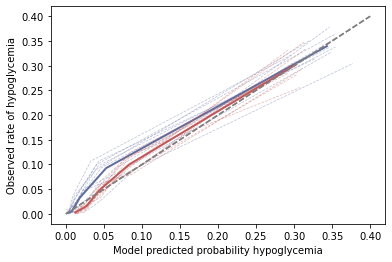

In [79]:
fig

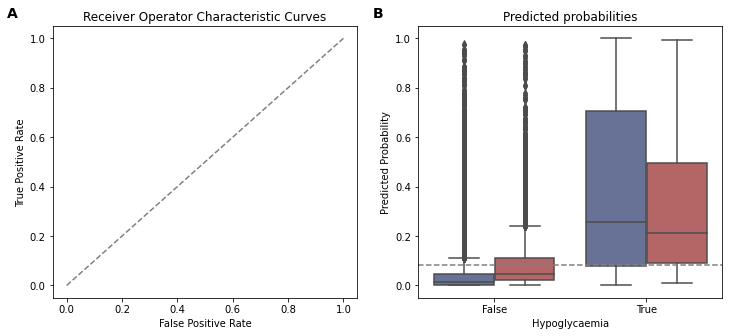

In [112]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve, CalibrationDisplay

# Set up figure with two subplots
fig, ax = plt.subplots(1,2,figsize=(12,5))
#fig, ax = plt.subplots(2,1,figsize=(6,11))


# ROC AUC curve
ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver Operator Characteristic Curves')
ax[0].text(-0.15, 1.02, 'A', transform=ax[0].transAxes, fontweight="bold", va="bottom", ha="left", fontsize=14)
#ax[0].grid(True)

'''
ax[1] = get_calibration_curve(ts_results_model_probability, ts_results_fraction_positive, 10, 0.4, ax[1], color_1)
ax[1] = get_calibration_curve(two_results_model_probability, two_results_fraction_positive, 10, 0.4, ax[1], color_2)
ax[1].text(-0.15, 1.02, 'B', transform=ax[1].transAxes, fontweight="bold", va="bottom", ha="left", fontsize=14)
ax[1].set_title('Calibration Curves')

'''# Add the sens-spec curve
ax[1] = sns.boxplot(hue=df_melted['Model'], y=df_melted['Predicted Probability'], x=df_melted['Hypoglycaemia'], palette=[color_1, color_2])
ax[1].text(-0.15, 1.02, 'B', transform=ax[1].transAxes, fontweight="bold", va="bottom", ha="left", fontsize=14)
ax[1].set_title('Predicted probabilities')
ax[1].axhline(y=xgb_two_k_fold_results.threshold.mean(), color='grey', linestyle='--', label='Mean Threshold')

# Adjust the alpha of the violins
for artist in ax[1].collections:
    artist.set_alpha(1)
# Remove the legend
ax[1].legend_.remove()
# Adjust the alpha of the boxes after the plot is created
#for patch in ax[1].patches:
 #   color = patch.get_facecolor()
  #  patch.set_facecolor((color[0], color[1], color[2], 0.7))  # Set alpha to 0.8



In [113]:
# Add the roc curve
ax[0] = ml_help.k_fold_threshold_curves(ax[0], xgb_ts_observed, xgb_ts_predicted_probas, color_1,'-', '')
ax[0] = ml_help.k_fold_threshold_curves(ax[0], xgb_two_observed, xgb_two_predicted_probas, color_2,'-',  '')

# Add legend
fig.legend()

In [114]:
# Adjust the bottom of the figure to make space for the table
fig.subplots_adjust(bottom=0.2)

# Add the table at the bottom of the fig
table_ax = fig.add_axes([0.125, -0.15, 0.775, 0.25])  # Adjust these values to change table position and size
table_ax.axis('off')
table = table_ax.table(cellText=data, colLabels=cols, cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjusting the cell heights
cell_height = 0.25
for i, cell in enumerate(table._cells):
    table._cells[cell].set_height(cell_height)

# Bold the header and the row labels
for (i, j), cell in table.get_celld().items():
    if i == 0 or j == 0:
        cell.set_text_props(fontweight='bold')

# Label for the table
table_ax.text(-0.05, 1, 'C', fontweight="bold", fontsize=14)

# Manually setting the borders
for i in range(len(cols)):
    table[0,i].visible_edges = 'B'  # header row
    table[0,i].visible_edges = 'T'  # 2nd row
    table[1,i].visible_edges = 'T'  # 3rd row
    table[2,i].visible_edges = 'B'  # bottom row


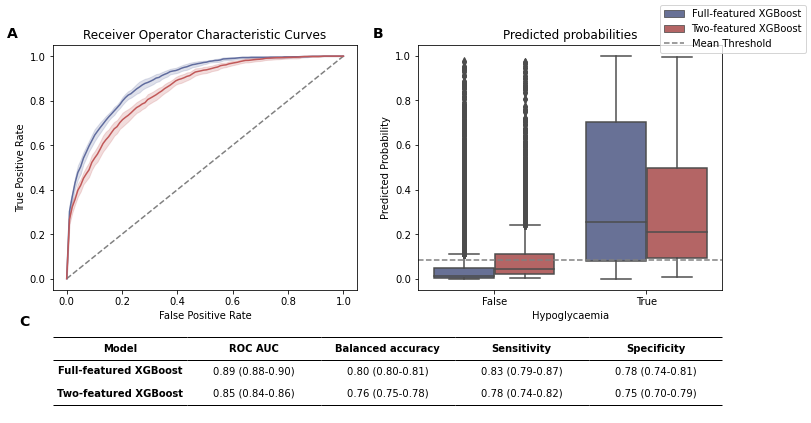

In [115]:
fig

In [91]:
# Table data
'''cols = ['Model', 'ROC AUC (95% CI)', 'Balanced accuracy (95% CI)', 'Sensitivity (95% CI)', 'Specificity (95% CI)']
data = [
    ['Full-featured XGBoost', xgb_all_row[0], xgb_all_row[1], xgb_all_row[2], xgb_all_row[3]],
    ['Two-featured XGBoost', xgb_two_row[0], xgb_two_row[1], xgb_two_row[2], xgb_two_row[3]]
]'''

# Adjust the bottom of the figure to make space for the table
fig.subplots_adjust(bottom=0.2)

# Add the table at the bottom of the fig
table_ax = fig.add_axes([0.125, -0.15, 0.775, 0.25])  # Adjust these values to change table position and size
#table_ax = fig.add_axes([-0.25, -0.25, 1.7, 0.25])  # Adjust these values to change table position and size

table_ax.axis('off')
table = table_ax.table(cellText=data, colLabels=cols, cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjusting the cell heights
cell_height = 0.25
for i, cell in enumerate(table._cells):
    table._cells[cell].set_height(cell_height)

# Bold the header and the row labels
for (i, j), cell in table.get_celld().items():
    if i == 0 or j == 0:
        cell.set_text_props(fontweight='bold')

# Label for the table
table_ax.text(-0.05, 1, 'C', fontweight="bold", fontsize=14)

# Manually setting the borders
for i in range(len(cols)):
    table[0,i].visible_edges = 'B'  # header row
    table[0,i].visible_edges = 'T'  # 2nd row
    table[1,i].visible_edges = 'T'  # 3rd row
    table[2,i].visible_edges = 'B'  # bottom row


In [92]:
fig.tight_layout()

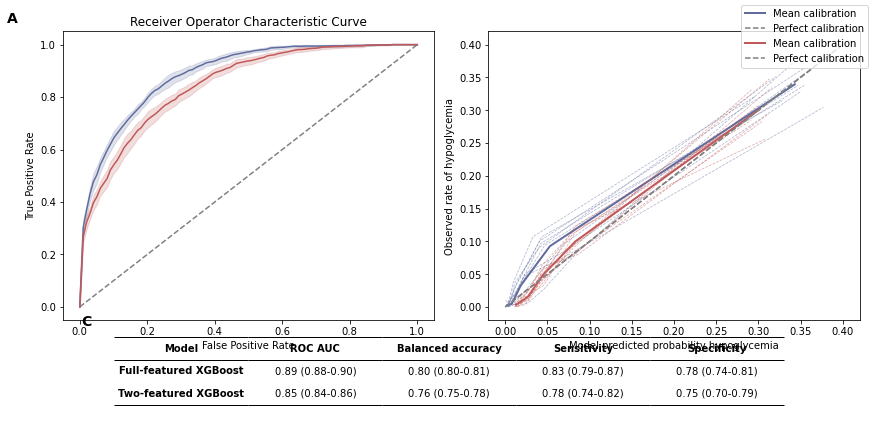

In [93]:
fig

In [46]:
fig.savefig('../../results/figs/fig_1.pdf', bbox_inches='tight')